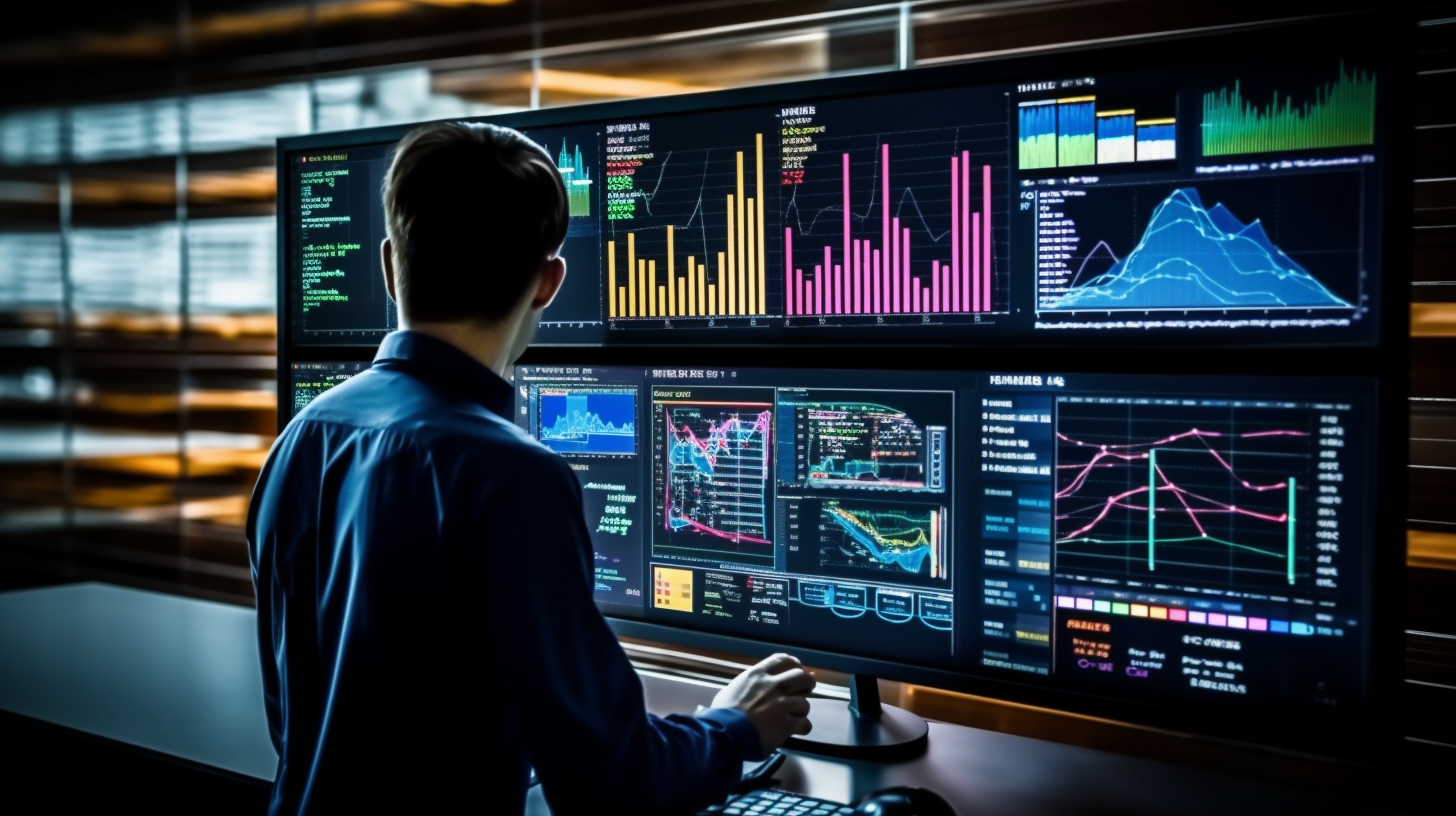

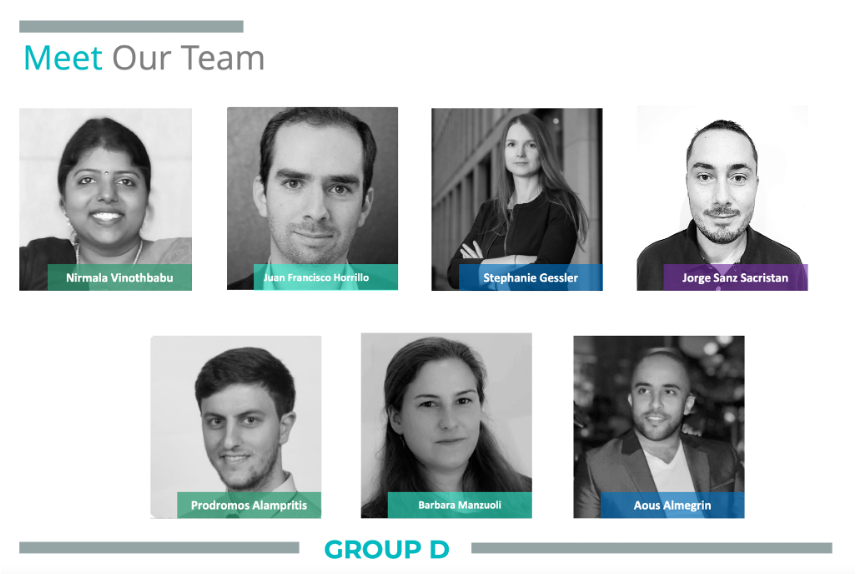

**Table of contents**<a id='toc0_'></a>    
- [Original Dataset](#toc1_)    
- [Regular and Seasonal differences d=1 and D=1](#toc2_)    
- [ Grid Search for best Models](#toc3_)    
- [Model 1 : (0,1,0)(1,1,0,s)](#toc4_)    
- [Model comparison](#toc5_)    
- [Model 2 : (1,1,1)(1,1,0,s)](#toc6_)    
- [Model 3 : (0,1,1)(0,1,1,s)](#toc7_)    
- [Model 4 : (2,1,0)(0,1,1,s)](#toc8_)    
- [Model 5 : (1,1,1)(1,1,0,s)](#toc9_)    
- [Log Transformation](#toc10_)    
- [Model 6 :log (0,1,0)(0,1,0,s)](#toc11_)    
- [Model 7 :log (0,1,1)(0,1,1,s)](#toc12_)    
- [Model 8 :log (1,1,2)(1,1,0,s)](#toc13_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Original Dataset](#toc0_)

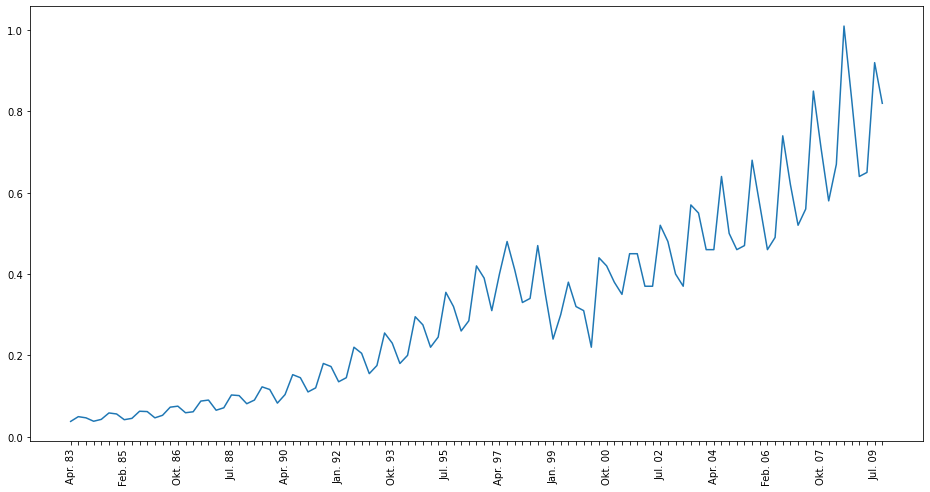

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

datos = pd.read_csv('coca_cola_earnings.csv', sep=";",decimal=",")
y = datos.iloc[:,1]
x = datos.iloc[:,0]
plt.figure(figsize=(16,8))
plt.plot(x,y)
plt.xticks(rotation=90)
ax = plt.gca()
temp = ax.xaxis.get_ticklabels()
temp = list(set(temp) - set(temp[::7]))
for label in temp:
    label.set_visible(False)
plt.show()

In [2]:
#!pip install pmdarima

In [3]:
import statsmodels as sm
import pmdarima
from pmdarima.arima import ndiffs, nsdiffs

# Ho: the process is not stationary. We need, at least, a unit root
# H1: the process is stationary. We have to check different models (lags)

adf_test = sm.tsa.stattools.adfuller(y,maxlag=50) 
# print("adf_test", adf_test) # first output "The test statistic", second output "p-value"
print("ADF test for the original series")
print("Statistic Value:" , adf_test[0])
print("p-value:" , adf_test[1])


# Tests
s = 4
d = ndiffs(y, alpha = 0.05, test='adf')  # regular differences?
D = nsdiffs(y, m = s, test='ocsb') # # seasonal differences?

print("Regular differences: ", d)
print('Seasonal differences:', D)

ADF test for the original series
Statistic Value: 0.8957525362617011
p-value: 0.9930346446754534
Regular differences:  1
Seasonal differences: 1


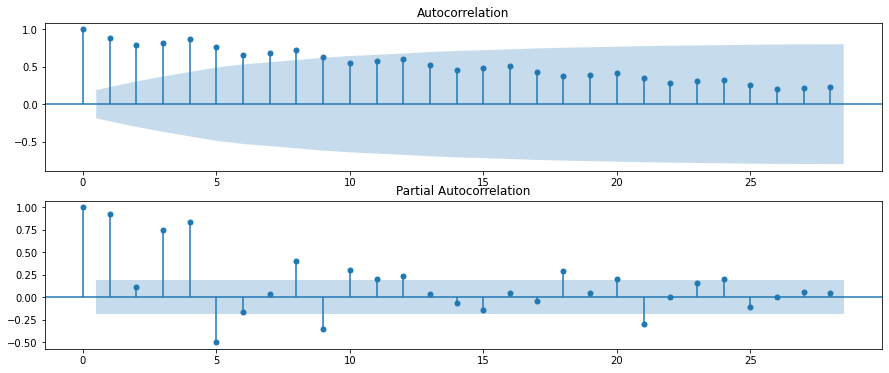

In [4]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

nlags = 28 # play with this parameter

# ValueError: Can only compute partial correlations for lags up to 50% of the sample size.

fig, ax = plt.subplots(2,1, figsize = (15,6))

plot_acf(y, lags = nlags, ax=ax[0])
plot_pacf(y, lags = nlags, method="ols", ax=ax[1])
plt.show()


# <a id='toc2_'></a>[Regular and Seasonal differences d=1 and D=1](#toc0_)

C:\Users\Stephanie\anaconda3\envs\Depreciated\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                                     SARIMAX Results                                     
Dep. Variable:                             value   No. Observations:                  107
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 4)   Log Likelihood                 180.028
Date:                           Wed, 19 Oct 2022   AIC                           -358.055
Time:                                   06:39:48   BIC                           -355.430
Sample:                                        0   HQIC                          -356.992
                                           - 107                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0017      0.000     10.999      0.000       0.001       0.002
Ljung-Box (L1) (Q):                  10.23 

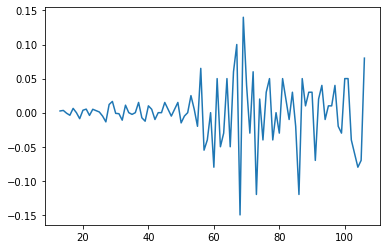

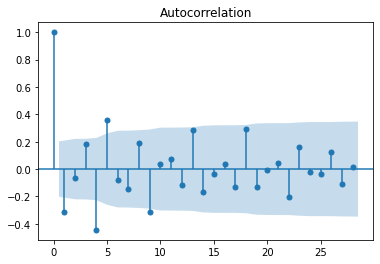

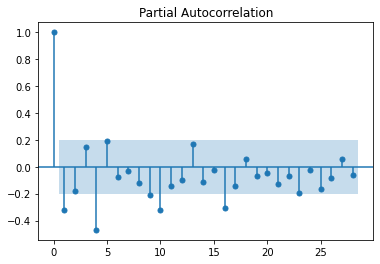

In [5]:
s = 4

fit = SARIMAX(endog = y, order = (,1,0), seasonal_order = (0,1,0,s)).fit()
print(fit.summary())
residuos = fit.resid[13:]

nlags=28

plt.plot(residuos)
plt.show()
plot_acf(residuos, lags = nlags)
plt.show()
plot_pacf(residuos, method="ols",lags = nlags)
plt.show()

In [6]:
d = ndiffs(residuos, alpha = 0.05, test='adf')  # regular differences?
D = nsdiffs(residuos, m = s, test='ocsb') # # seasonal differences?

print("Regular differences: ", d)
print('Seasonal differences:', D)

Regular differences:  0
Seasonal differences: 0


C:\Users\Stephanie\anaconda3\envs\Depreciated\lib\site-packages\statsmodels\stats\diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


Ljung-Box: Statistic value [104.96255646] p-value [7.82836499e-11]
Shapido: Statistic value 0.940062403678894 p-value 0.0003113910206593573


C:\Users\Stephanie\anaconda3\envs\Depreciated\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


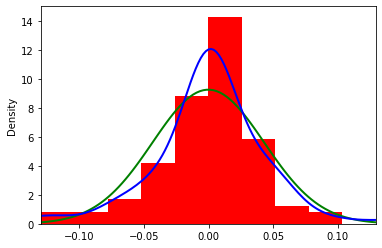

In [7]:
# Box test
import statsmodels.api as sm
box_test = sm.stats.acorr_ljungbox(residuos, lags=[28])

print("Ljung-Box: Statistic value", box_test[0], "p-value", box_test[1]) 

from scipy.stats import shapiro
import seaborn as sns
import scipy.stats as st

# Normalitresiduos test

saphiro = shapiro(residuos)
print("Shapido: Statistic value", saphiro[0],"p-value",saphiro[1]) # first output "The test statistic", second output "p-value"

mean = np.mean(residuos)
std = np.std(residuos)
mu = np.mean(residuos)
sigma = np.std(residuos)
x = np.linspace(mu -3*sigma, mu +3*sigma, 100)
pdf = st.norm.pdf(x, mu, sigma)
ax = plt.plot(x, pdf, lw = 2, color = "g")
ax = plt.hist(residuos,density=True, range = (mean - 3*std, mean + 3*std), color = "r")
ax = sns.distplot(residuos, hist = False, kde = True,
                 kde_kws = {'linewidth': 2}, color = "blue")
ax.set_xlim(mean - 3*std, mean + 3*std)

plt.show()

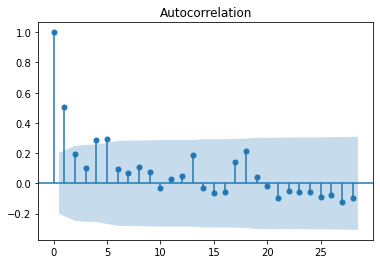

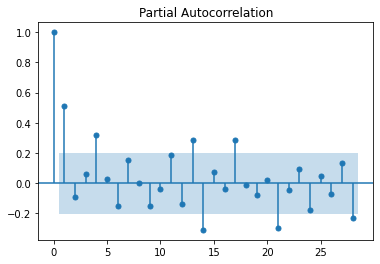

Ljung-Box for squared residuals
Statistic value [70.12650319] p_value [1.78675706e-05]


C:\Users\Stephanie\anaconda3\envs\Depreciated\lib\site-packages\statsmodels\stats\diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


In [8]:
# Study the squared residuals for SWN

plot_acf(residuos**2,lags=nlags)
plt.show()
plot_pacf(residuos**2,lags=nlags)
plt.show()

box_test2 = sm.stats.acorr_ljungbox(residuos**2, lags=[28])
print("Ljung-Box for squared residuals")
print("Statistic value",box_test2[0],"p_value",box_test2[1])

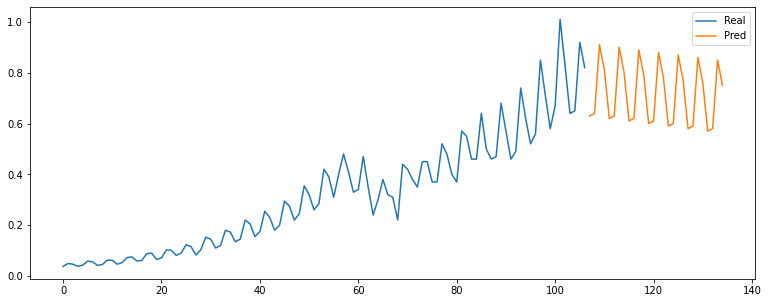

In [9]:
# Pintamos las siguientes 24 predicciones
y_pred = fit.forecast(steps = 28)

# Ponemos el último índice real
# y_pred.loc[len(y)-1] = y[len(y)-1]

# Reseteamos los índices, ordenamos por índice y volvemos a poner el índice como índice de la Serie.
y_pred = y_pred.reset_index().sort_values(by = 'index').set_index('index')

# Las predicciones dan 0, el modelo arriba que está con todos los parámetros en 0 salvo
# el 's' no sé si dará algún problema en Python y no lo haga como en R o me he equivocado en otro sitio
# print(y_pred)
plt.figure(figsize = (13,5))
plt.plot(y, label = 'Real')
plt.plot(y_pred, label = 'Pred')
plt.legend()
plt.show()

In [10]:
std = np.std(residuos)

quantile_2_5=np.quantile(residuos, 0.025)
quantile_97_5=np.quantile(residuos, 0.975)

print("95% confidence intervals using quantiles")
print("Lower limit 2.5%:",quantile_2_5,"Upper limit 97.5%:",quantile_97_5)

print("95% confidence intervals assuming normality")
print("Normal Percentile 2.5%:",-1.96*std,"Normal Percentile 97.5%:",1.96*std)

95% confidence intervals using quantiles
Lower limit 2.5%: -0.106999995911528 Upper limit 97.5%: 0.0751249965170642
95% confidence intervals assuming normality
Normal Percentile 2.5%: -0.08455681024012708 Normal Percentile 97.5%: 0.08455681024012708


In [11]:
model = SARIMAX(endog = y, order = (0,1,0), seasonal_order = (0,1,0,s))
results = model.fit(disp=0)

# model_fit=model.fit(disp=0)

C:\Users\Stephanie\anaconda3\envs\Depreciated\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [12]:
# Here we construct a more complete results object.
fcast_res1 = results.get_forecast()

# Most results are collected in the `summary_frame` attribute.
# Here we specify that we want a confidence level of 90%
print(fcast_res1.summary_frame(alpha=0.10))

value  mean   mean_se  mean_ci_lower  mean_ci_upper
107    0.63  0.041419       0.561872       0.698128


In [13]:
fcast_res2 = results.get_forecast(steps=8)
# Note: since we did not specify the alpha parameter, the
# confidence level is at the default, 95%
print(fcast_res2.summary_frame())

value  mean   mean_se  mean_ci_lower  mean_ci_upper
107    0.63  0.041419       0.548821       0.711179
108    0.64  0.058575       0.525195       0.754805
109    0.91  0.071739       0.769393       1.050607
110    0.81  0.082838       0.647641       0.972359
111    0.62  0.117150       0.390390       0.849610
112    0.63  0.143479       0.348786       0.911214
113    0.90  0.165675       0.575282       1.224718
114    0.80  0.185231       0.436955       1.163045


In [14]:

sarima_01_model = SARIMAX(y, order = (0,1,0), seasonal_order = (0,1,0,s))
sarima_01_results = sarima_01_model.fit()

# Calculate the mean absolute error from residuals
mae = np.mean(np.abs(sarima_01_results.resid))

# Print mean absolute error
print('MAE: %.3f' % mae)

MAE: 0.026


C:\Users\Stephanie\anaconda3\envs\Depreciated\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


# <a id='toc3_'></a>[ Grid Search for best Models](#toc0_)

In [21]:
import itertools
import warnings
warnings.filterwarnings("ignore")

def sarima_grid_search(y,seasonal_period):
    p = q = d = range(0, 2)
    #d = range(0,1)
    
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = [(x[0], x[1], x[2],seasonal_period) for x in list(itertools.product(p, d, q))]
    
    mini = float('+inf')
    
    
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(np.log(y),
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)

                results = mod.fit()
                
                if results.aic < mini:
                    mini = results.aic
                    param_mini = param
                    param_seasonal_mini = param_seasonal

                    print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
                    print('SARIMA{}x{} - BIC:{}'.format(param, param_seasonal, results.bic))
            except:
                continue
    print('The set of parameters with the minimum AIC is: SARIMA{}x{} - AIC:{}'.format(param_mini, param_seasonal_mini, mini))

In [22]:
sarima_grid_search(y,4)

SARIMA(0, 0, 0)x(0, 0, 0, 4) - AIC:415.7314756626149
SARIMA(0, 0, 0)x(0, 0, 0, 4) - BIC:418.39491475672696
SARIMA(0, 0, 0)x(0, 0, 1, 4) - AIC:272.2942256044421
SARIMA(0, 0, 0)x(0, 0, 1, 4) - BIC:277.54417123101064
SARIMA(0, 0, 0)x(0, 1, 0, 4) - AIC:-78.33159909515018
SARIMA(0, 0, 0)x(0, 1, 0, 4) - BIC:-75.70662628186591
SARIMA(0, 0, 0)x(0, 1, 1, 4) - AIC:-88.00064813763882
SARIMA(0, 0, 0)x(0, 1, 1, 4) - BIC:-82.83071318029768
SARIMA(0, 0, 0)x(1, 0, 0, 4) - AIC:-152.0722526362673
SARIMA(0, 0, 0)x(1, 0, 0, 4) - BIC:-146.80279465980803
SARIMA(0, 0, 1)x(1, 0, 0, 4) - AIC:-166.75364755276132
SARIMA(0, 0, 1)x(1, 0, 0, 4) - BIC:-158.84946058807242
SARIMA(0, 0, 1)x(1, 0, 1, 4) - AIC:-167.5189381772563
SARIMA(0, 0, 1)x(1, 0, 1, 4) - BIC:-157.05845610989127
SARIMA(0, 1, 0)x(0, 1, 1, 4) - AIC:-177.19717269381968
SARIMA(0, 1, 0)x(0, 1, 1, 4) - BIC:-172.04775073681293
SARIMA(0, 1, 0)x(1, 0, 1, 4) - AIC:-184.30671548829932
SARIMA(0, 1, 0)x(1, 0, 1, 4) - BIC:-176.46135393777553
SARIMA(0, 1, 1)x(0, 1,

The best model is SARIMA(1, 0, 1)x(1, 0, 1, 4) - AIC:-198.39585541141668

# <a id='toc4_'></a>[Model 1 : (0,1,0)(1,1,0,s)](#toc0_)

                                     SARIMAX Results                                     
Dep. Variable:                             value   No. Observations:                  107
Model:             SARIMAX(0, 1, 0)x(1, 1, 0, 4)   Log Likelihood                 192.457
Date:                           Sun, 16 Oct 2022   AIC                           -380.914
Time:                                   10:10:32   BIC                           -375.665
Sample:                                        0   HQIC                          -378.789
                                           - 107                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L4       -0.4841      0.084     -5.764      0.000      -0.649      -0.319
sigma2         0.0013      0.000      9.442

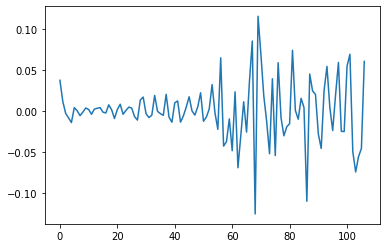

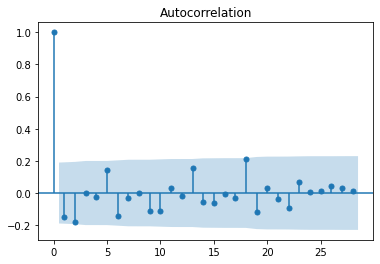

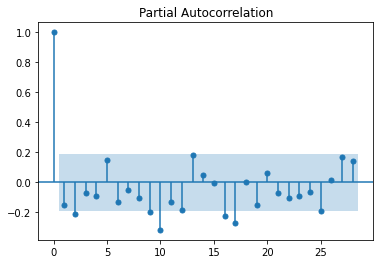

In [88]:
s = 4

fit = SARIMAX(endog = y, order = (0,1,0), seasonal_order = (1,1,0,s)).fit()
print(fit.summary())
residuos = fit.resid[:]

nlags=28

plt.plot(residuos)
plt.show()
plot_acf(residuos, lags = nlags)
plt.show()
plot_pacf(residuos, method="ols",lags = nlags)
plt.show()

In [89]:
d = ndiffs(residuos, alpha = 0.05, test='adf')  # regular differences?
D = nsdiffs(residuos, m = s, test='ocsb') # # seasonal differences?

print("Regular differences: ", d)
print('Seasonal differences:', D)

Regular differences:  0
Seasonal differences: 0


Ljung-Box: Statistic value [28.48331093] p-value [0.43907067]
Shapido: Statistic value 0.9442346096038818 p-value 0.00021097973512951285


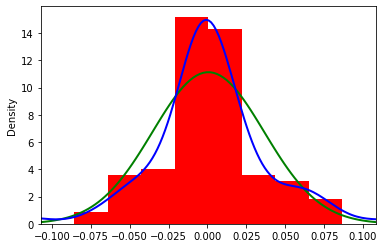

In [90]:
# Box test
import statsmodels.api as sm
box_test = sm.stats.acorr_ljungbox(residuos, lags=[28])

print("Ljung-Box: Statistic value", box_test[0], "p-value", box_test[1]) 

from scipy.stats import shapiro
import seaborn as sns
import scipy.stats as st

# Normalitresiduos test

saphiro = shapiro(residuos)
print("Shapido: Statistic value", saphiro[0],"p-value",saphiro[1]) # first output "The test statistic", second output "p-value"

mean = np.mean(residuos)
std = np.std(residuos)
mu = np.mean(residuos)
sigma = np.std(residuos)
x = np.linspace(mu -3*sigma, mu +3*sigma, 100)
pdf = st.norm.pdf(x, mu, sigma)
ax = plt.plot(x, pdf, lw = 2, color = "g")
ax = plt.hist(residuos,density=True, range = (mean - 3*std, mean + 3*std), color = "r")
ax = sns.distplot(residuos, hist = False, kde = True,
                 kde_kws = {'linewidth': 2}, color = "blue")
ax.set_xlim(mean - 3*std, mean + 3*std)

plt.show()

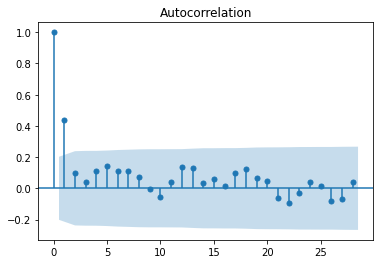

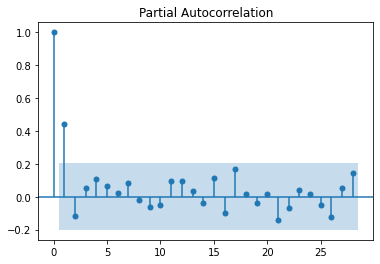

Ljung-Box for squared residuals
Statistic value [38.69923313] p_value [0.08588314]


In [26]:
# Study the squared residuals for SWN

plot_acf(residuos**2,lags=nlags)
plt.show()
plot_pacf(residuos**2,lags=nlags)
plt.show()

box_test2 = sm.stats.acorr_ljungbox(residuos**2, lags=[28])
print("Ljung-Box for squared residuals")
print("Statistic value",box_test2[0],"p_value",box_test2[1])

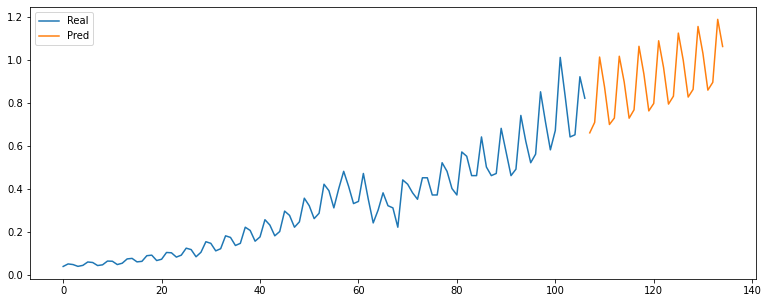

In [56]:
# Pintamos las siguientes 24 predicciones
y_pred = fit.forecast(steps = 28)

# Ponemos el último índice real
# y_pred.loc[len(y)-1] = y[len(y)-1]

# Reseteamos los índices, ordenamos por índice y volvemos a poner el índice como índice de la Serie.
y_pred = y_pred.reset_index().sort_values(by = 'index').set_index('index')

# Las predicciones dan 0, el modelo arriba que está con todos los parámetros en 0 salvo
# el 's' no sé si dará algún problema en Python y no lo haga como en R o me he equivocado en otro sitio
# print(y_pred)
plt.figure(figsize = (13,5))
plt.plot(y, label = 'Real')
plt.plot(y_pred, label = 'Pred')
plt.legend()
plt.show()

In [57]:
model =  SARIMAX(endog = y, order = (0,1,0), seasonal_order = (1,1,0,s))
results = model.fit()

In [58]:
# Here we construct a more complete results object.
fcast_res1 = results.get_forecast()

# Most results are collected in the `summary_frame` attribute.
# Here we specify that we want a confidence level of 90%
print(fcast_res1.summary_frame(alpha=0.10))

value      mean   mean_se  mean_ci_lower  mean_ci_upper
107    0.659044  0.036476       0.599047       0.719041


In [59]:
fcast_res2 = results.get_forecast(steps=8)
# Note: since we did not specify the alpha parameter, the
# confidence level is at the default, 95%
print(fcast_res2.summary_frame())

value      mean   mean_se  mean_ci_lower  mean_ci_upper
107    0.659044  0.036476       0.587553       0.730535
108    0.707769  0.051584       0.606666       0.808873
109    1.011654  0.063178       0.887828       1.135480
110    0.872929  0.072951       0.729946       1.015911
111    0.697913  0.091539       0.518500       0.877327
112    0.727893  0.106944       0.518288       0.937499
113    1.015375  0.120393       0.779410       1.251341
114    0.895396  0.132484       0.635732       1.155059


In [60]:

sarima_01_model = SARIMAX(endog = y, order = (0,1,0), seasonal_order = (1,1,0,s))
sarima_01_results = sarima_01_model.fit()

# Calculate the mean absolute error from residuals
mae = np.mean(np.abs(sarima_01_results.resid))

# Print mean absolute error
print('MAE: %.3f' % mae)

MAE: 0.024


In [20]:
import pmdarima as pm

# Create auto_arima model
model1 = pm.auto_arima(y, #time series
                      seasonal=True, # is the time series seasonal
                      m=4, # the seasonal period - one week?
                      d=1, # non-seasonal difference order
                      D=1, # seasonal difference order
                      max_p=4, # max value of p to test 
                      max_q=4, # max value of p to test
                      max_P=4, # max value of P to test 
                      max_Q=4, # max value of Q to test 
                      information_criterion='aic', # used to select best mode
                      trace=True, # prints the information_criterion for each model it fits
                      error_action='ignore', # ignore orders that don't work
                      stepwise=True, # apply an intelligent order search
                      suppress_warnings=True) 

# Print model summary
print(model1.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[4]             : AIC=-198.379, Time=0.91 sec
 ARIMA(0,1,0)(0,1,0)[4]             : AIC=-139.019, Time=0.07 sec
 ARIMA(1,1,0)(1,1,0)[4]             : AIC=-182.819, Time=0.17 sec
 ARIMA(0,1,1)(0,1,1)[4]             : AIC=-202.503, Time=0.28 sec
 ARIMA(0,1,1)(0,1,0)[4]             : AIC=-163.251, Time=0.07 sec
 ARIMA(0,1,1)(1,1,1)[4]             : AIC=-201.278, Time=0.42 sec
 ARIMA(0,1,1)(0,1,2)[4]             : AIC=-201.167, Time=0.63 sec
 ARIMA(0,1,1)(1,1,0)[4]             : AIC=-184.094, Time=0.23 sec
 ARIMA(0,1,1)(1,1,2)[4]             : AIC=-198.548, Time=0.51 sec
 ARIMA(0,1,0)(0,1,1)[4]             : AIC=-188.555, Time=0.10 sec
 ARIMA(1,1,1)(0,1,1)[4]             : AIC=-200.508, Time=0.37 sec
 ARIMA(0,1,2)(0,1,1)[4]             : AIC=-200.509, Time=0.54 sec
 ARIMA(1,1,0)(0,1,1)[4]             : AIC=-199.650, Time=0.40 sec
 ARIMA(1,1,2)(0,1,1)[4]             : AIC=-198.556, Time=0.39 sec
 ARIMA(0,1,1)(0,1,1)[4] intercept

In [33]:
model3 = SARIMAX(endog = y, order = (1,1,1), seasonal_order = (1,1,0,s))
results3 = model3.fit(disp=0)

# <a id='toc5_'></a>[Model comparison](#toc0_)

In [35]:
# Create ARIMA mean forecast

arima_pred = results.get_prediction(start=-12, dynamic=True)
arima_mean = arima_pred.predicted_mean

# Create SARIMA mean forecast
sarima_01_pred = sarima_01_results.get_prediction(start=-12, dynamic=True)
sarima_01_mean = sarima_01_pred.predicted_mean

# Create SARIMA mean forecast
sarima_02_pred =results3.get_prediction(start=-12, dynamic=True)
sarima_02_mean = sarima_02_pred.predicted_mean

In [37]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

metrics_arima = [round(mean_absolute_error(y[-12:],arima_mean),3), 
                 round(mean_absolute_percentage_error(y[-12:],arima_mean),3)]

metrics_sarima_01 = [round(mean_absolute_error(y[-12:],sarima_01_mean),3), 
                       round(mean_absolute_percentage_error(y[-12:],sarima_01_mean),3)]

metrics_sarima_02 = [round(mean_absolute_error(y[-12:],sarima_02_mean),3),
                       round(mean_absolute_percentage_error(y[-12:],sarima_02_mean),3)]


In [38]:
df_arima_results = pd.DataFrame({'metrics':['MAE','MAPE'],
              'SARIMA(0,1,0)(0,0,0)7':metrics_arima, 
              'SARIMA(1,0,0)(0,0,0)7':metrics_sarima_01,
              'SARIMA(0,1,0)(0,0,1)7':metrics_sarima_02,
             })

df_arima_results

,metrics,"SARIMA(0,1,0)(0,0,0)7","SARIMA(1,0,0)(0,0,0)7","SARIMA(0,1,0)(0,0,1)7"
0,MAE,0.109,0.042,0.082
1,MAPE,0.140,0.052,0.104


# <a id='toc6_'></a>[Model 2 : (1,1,1)(1,1,0,s)](#toc0_)

                                     SARIMAX Results                                      
Dep. Variable:                              value   No. Observations:                  107
Model:             SARIMAX(1, 1, 1)x(1, 1, [], 4)   Log Likelihood                 198.783
Date:                            Sun, 16 Oct 2022   AIC                           -389.566
Time:                                    07:42:35   BIC                           -379.066
Sample:                                         0   HQIC                          -385.314
                                            - 107                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6937      0.080      8.667      0.000       0.537       0.851
ma.L1         -0.9731      0.042   

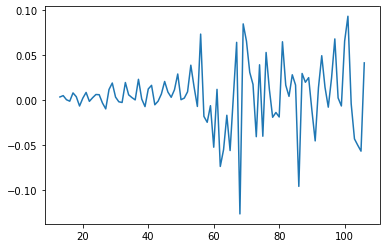

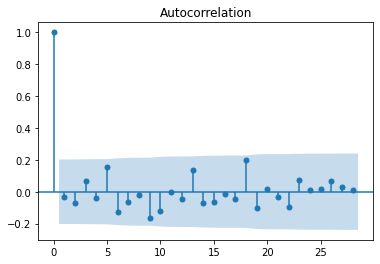

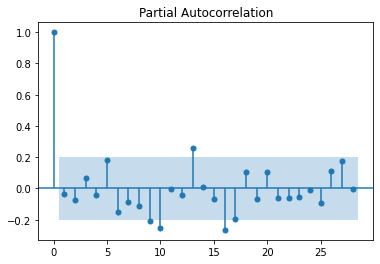

In [39]:
s = 4

fit = SARIMAX(endog = y, order = (1,1,1), seasonal_order = (1,1,0,s)).fit()
print(fit.summary())
residuos = fit.resid[13:]

nlags=28

plt.plot(residuos)
plt.show()
plot_acf(residuos, lags = nlags)
plt.show()
plot_pacf(residuos, method="ols",lags = nlags)
plt.show()

In [95]:
d = ndiffs(residuos, alpha = 0.05, test='adf')  # regular differences?
D = nsdiffs(residuos, m = s, test='ocsb') # # seasonal differences?

print("Regular differences: ", d)
print('Seasonal differences:', D)

Regular differences:  1
Seasonal differences: 0


Ljung-Box: Statistic value [30.57240421] p-value [0.33639124]
Shapido: Statistic value 0.9414291381835938 p-value 0.0003751642943825573


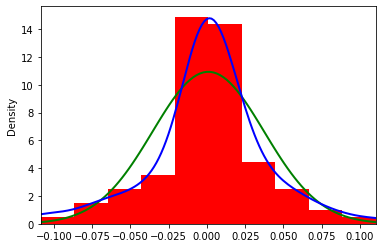

In [96]:
# Box test
import statsmodels.api as sm
box_test = sm.stats.acorr_ljungbox(residuos, lags=[28])

print("Ljung-Box: Statistic value", box_test[0], "p-value", box_test[1]) 

from scipy.stats import shapiro
import seaborn as sns
import scipy.stats as st

# Normalitresiduos test

saphiro = shapiro(residuos)
print("Shapido: Statistic value", saphiro[0],"p-value",saphiro[1]) # first output "The test statistic", second output "p-value"

mean = np.mean(residuos)
std = np.std(residuos)
mu = np.mean(residuos)
sigma = np.std(residuos)
x = np.linspace(mu -3*sigma, mu +3*sigma, 100)
pdf = st.norm.pdf(x, mu, sigma)
ax = plt.plot(x, pdf, lw = 2, color = "g")
ax = plt.hist(residuos,density=True, range = (mean - 3*std, mean + 3*std), color = "r")
ax = sns.distplot(residuos, hist = False, kde = True,
                 kde_kws = {'linewidth': 2}, color = "blue")
ax.set_xlim(mean - 3*std, mean + 3*std)

plt.show()

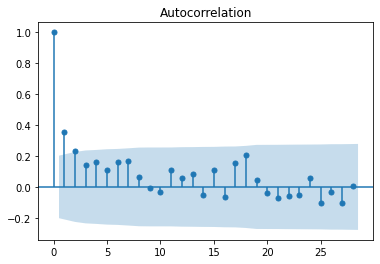

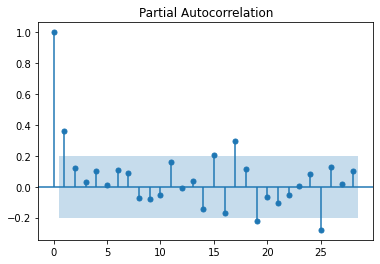

Ljung-Box for squared residuals
Statistic value [47.19280228] p_value [0.01307037]


In [97]:
# Study the squared residuals for SWN

plot_acf(residuos**2,lags=nlags)
plt.show()
plot_pacf(residuos**2,lags=nlags)
plt.show()

box_test2 = sm.stats.acorr_ljungbox(residuos**2, lags=[28])
print("Ljung-Box for squared residuals")
print("Statistic value",box_test2[0],"p_value",box_test2[1])

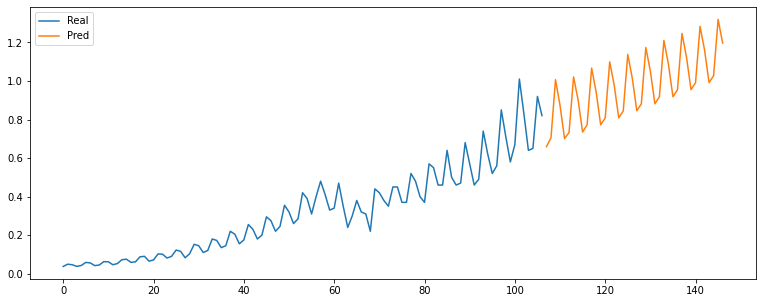

In [43]:
# Pintamos las siguientes 24 predicciones
y_pred = fit.forecast(steps = 40)

# Ponemos el último índice real
# y_pred.loc[len(y)-1] = y[len(y)-1]

# Reseteamos los índices, ordenamos por índice y volvemos a poner el índice como índice de la Serie.
y_pred = y_pred.reset_index().sort_values(by = 'index').set_index('index')

# Las predicciones dan 0, el modelo arriba que está con todos los parámetros en 0 salvo
# el 's' no sé si dará algún problema en Python y no lo haga como en R o me he equivocado en otro sitio
# print(y_pred)
plt.figure(figsize = (13,5))
plt.plot(y, label = 'Real')
plt.plot(y_pred, label = 'Pred')
plt.legend()
plt.show()

In [44]:
model =  SARIMAX(endog = y, order = (0,1,1), seasonal_order = (1,1,0,s))
results = model.fit()

In [45]:
# Here we construct a more complete results object.
fcast_res1 = results.get_forecast()

# Most results are collected in the `summary_frame` attribute.
# Here we specify that we want a confidence level of 90%
print(fcast_res1.summary_frame(alpha=0.10))

value      mean   mean_se  mean_ci_lower  mean_ci_upper
107    0.643551  0.035704       0.584823        0.70228


In [46]:
fcast_res2 = results.get_forecast(steps=8)
# Note: since we did not specify the alpha parameter, the
# confidence level is at the default, 95%
print(fcast_res2.summary_frame())

value      mean   mean_se  mean_ci_lower  mean_ci_upper
107    0.643551  0.035704       0.573572       0.713530
108    0.687489  0.044178       0.600902       0.774076
109    0.987185  0.051270       0.886698       1.087671
110    0.853247  0.057493       0.740562       0.965932
111    0.671049  0.073991       0.526029       0.816070
112    0.700590  0.084590       0.534796       0.866384
113    0.987688  0.094001       0.803448       1.171927
114    0.868147  0.102553       0.667148       1.069147


# <a id='toc7_'></a>[Model 3 : (0,1,1)(0,1,1,s)](#toc0_)

                                     SARIMAX Results                                     
Dep. Variable:                             value   No. Observations:                  107
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 4)   Log Likelihood                 194.605
Date:                           Sun, 16 Oct 2022   AIC                           -383.210
Time:                                   15:26:31   BIC                           -375.336
Sample:                                        0   HQIC                          -380.022
                                           - 107                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3585      0.068     -5.311      0.000      -0.491      -0.226
ma.S.L4       -0.4108      0.066     -6.262

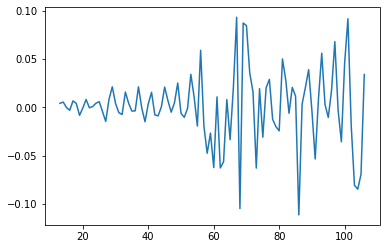

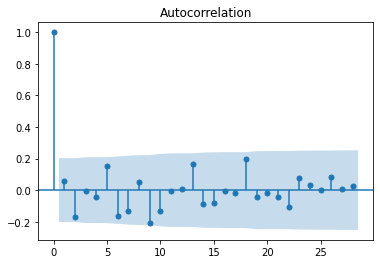

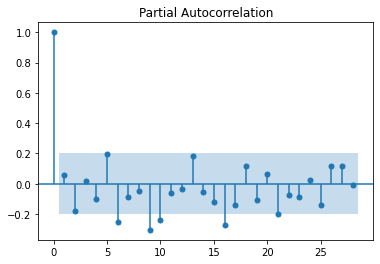

In [106]:
s = 4

fit = SARIMAX(endog = y, order = (0,1,1), seasonal_order = (0,1,1,s)).fit()
print(fit.summary())
residuos = fit.resid[13:]

nlags=28

plt.plot(residuos)
plt.show()
plot_acf(residuos, lags = nlags)
plt.show()
plot_pacf(residuos, method="ols",lags = nlags)
plt.show()

Ljung-Box: Statistic value [30.36335994] p-value [0.34606208]
Shapido: Statistic value 0.9402820467948914 p-value 0.0003208160924259573


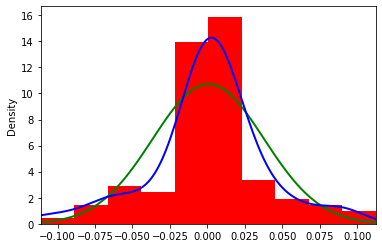

In [108]:
# Box test
import statsmodels.api as sm
box_test = sm.stats.acorr_ljungbox(residuos, lags=[28])

print("Ljung-Box: Statistic value", box_test[0], "p-value", box_test[1]) 

from scipy.stats import shapiro
import seaborn as sns
import scipy.stats as st

# Normalitresiduos test

saphiro = shapiro(residuos)
print("Shapido: Statistic value", saphiro[0],"p-value",saphiro[1]) # first output "The test statistic", second output "p-value"

mean = np.mean(residuos)
std = np.std(residuos)
mu = np.mean(residuos)
sigma = np.std(residuos)
x = np.linspace(mu -3*sigma, mu +3*sigma, 100)
pdf = st.norm.pdf(x, mu, sigma)
ax = plt.plot(x, pdf, lw = 2, color = "g")
ax = plt.hist(residuos,density=True, range = (mean - 3*std, mean + 3*std), color = "r")
ax = sns.distplot(residuos, hist = False, kde = True,
                 kde_kws = {'linewidth': 2}, color = "blue")
ax.set_xlim(mean - 3*std, mean + 3*std)

plt.show()

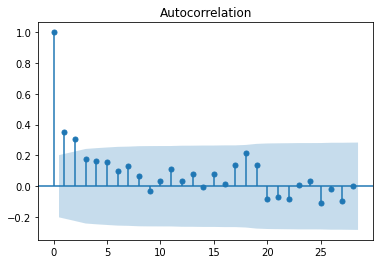

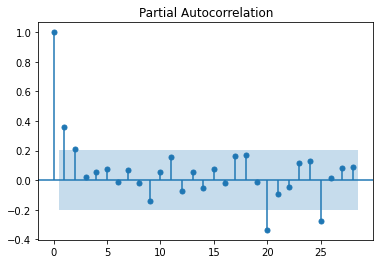

Ljung-Box for squared residuals
Statistic value [51.0702772] p_value [0.00490052]


In [109]:
# Study the squared residuals for SWN

plot_acf(residuos**2,lags=nlags)
plt.show()
plot_pacf(residuos**2,lags=nlags)
plt.show()

box_test2 = sm.stats.acorr_ljungbox(residuos**2, lags=[28])
print("Ljung-Box for squared residuals")
print("Statistic value",box_test2[0],"p_value",box_test2[1])

# <a id='toc8_'></a>[Model 4 : (2,1,0)(0,1,1,s)](#toc0_)

                                      SARIMAX Results                                      
Dep. Variable:                               value   No. Observations:                  107
Model:             SARIMAX(2, 1, 0)x(0, 1, [1], 4)   Log Likelihood                 196.516
Date:                             Sun, 16 Oct 2022   AIC                           -385.033
Time:                                     15:23:23   BIC                           -374.533
Sample:                                          0   HQIC                          -380.781
                                             - 107                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2467      0.059     -4.164      0.000      -0.363      -0.131
ar.L2         -0.2960      

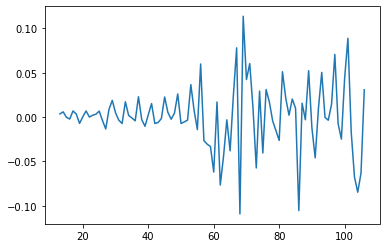

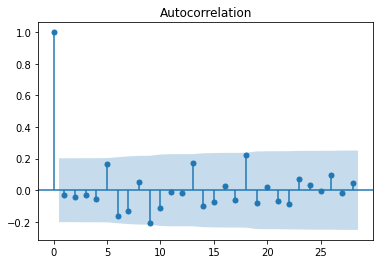

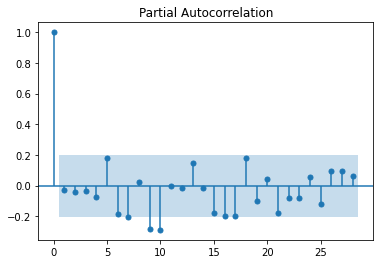

In [101]:
s = 4

fit = SARIMAX(endog = y, order = (2,1,0), seasonal_order = (0,1,1,s)).fit()
print(fit.summary())
residuos = fit.resid[13:]

nlags=28

plt.plot(residuos)
plt.show()
plot_acf(residuos, lags = nlags)
plt.show()
plot_pacf(residuos, method="ols",lags = nlags)
plt.show()

Ljung-Box: Statistic value [30.57240421] p-value [0.33639124]
Shapido: Statistic value 0.9414291381835938 p-value 0.0003751642943825573


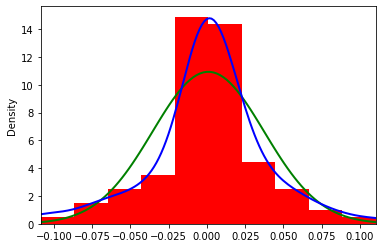

In [102]:
# Box test
import statsmodels.api as sm
box_test = sm.stats.acorr_ljungbox(residuos, lags=[28])

print("Ljung-Box: Statistic value", box_test[0], "p-value", box_test[1]) 

from scipy.stats import shapiro
import seaborn as sns
import scipy.stats as st

# Normalitresiduos test

saphiro = shapiro(residuos)
print("Shapido: Statistic value", saphiro[0],"p-value",saphiro[1]) # first output "The test statistic", second output "p-value"

mean = np.mean(residuos)
std = np.std(residuos)
mu = np.mean(residuos)
sigma = np.std(residuos)
x = np.linspace(mu -3*sigma, mu +3*sigma, 100)
pdf = st.norm.pdf(x, mu, sigma)
ax = plt.plot(x, pdf, lw = 2, color = "g")
ax = plt.hist(residuos,density=True, range = (mean - 3*std, mean + 3*std), color = "r")
ax = sns.distplot(residuos, hist = False, kde = True,
                 kde_kws = {'linewidth': 2}, color = "blue")
ax.set_xlim(mean - 3*std, mean + 3*std)

plt.show()

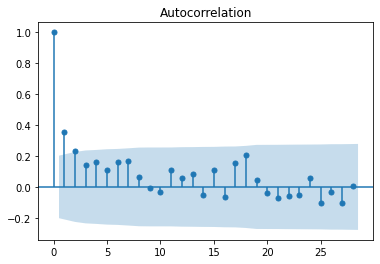

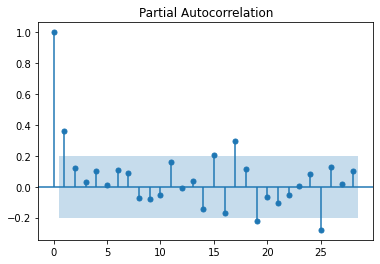

Ljung-Box for squared residuals
Statistic value [47.19280228] p_value [0.01307037]


In [103]:
# Study the squared residuals for SWN

plot_acf(residuos**2,lags=nlags)
plt.show()
plot_pacf(residuos**2,lags=nlags)
plt.show()

box_test2 = sm.stats.acorr_ljungbox(residuos**2, lags=[28])
print("Ljung-Box for squared residuals")
print("Statistic value",box_test2[0],"p_value",box_test2[1])

# <a id='toc9_'></a>[Model 5 : (1,1,1)(1,1,0,s)](#toc0_)

                                     SARIMAX Results                                      
Dep. Variable:                              value   No. Observations:                  107
Model:             SARIMAX(1, 1, 1)x(1, 1, [], 4)   Log Likelihood                 198.783
Date:                            Wed, 19 Oct 2022   AIC                           -389.566
Time:                                    06:45:58   BIC                           -379.066
Sample:                                         0   HQIC                          -385.314
                                            - 107                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6937      0.080      8.667      0.000       0.537       0.851
ma.L1         -0.9731      0.042   

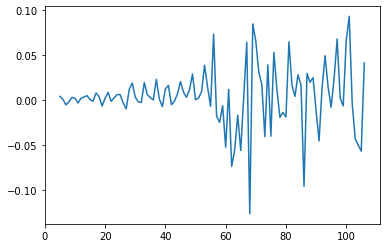

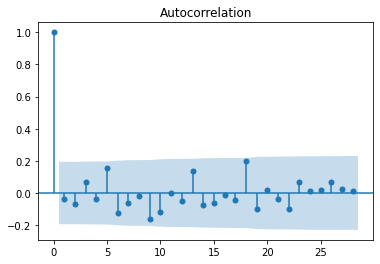

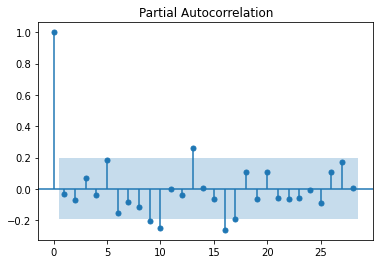

In [17]:
s = 4

fit = SARIMAX(endog = y, order = (1,1,1), seasonal_order = (1,1,0,s)).fit()
print(fit.summary())
residuos = fit.resid[5:]

nlags=28

plt.plot(residuos)
plt.show()
plot_acf(residuos, lags = nlags)
plt.show()
plot_pacf(residuos, method="ols",lags = nlags)
plt.show()

Ljung-Box: Statistic value [23.98751014] p-value [0.68219474]
Shapido: Statistic value 0.920417308807373 p-value 1.2345771210675593e-05


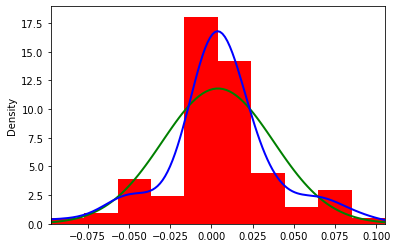

In [18]:
# Box test
import statsmodels.api as sm
box_test = sm.stats.acorr_ljungbox(residuos, lags=[28])

print("Ljung-Box: Statistic value", box_test[0], "p-value", box_test[1]) 

from scipy.stats import shapiro
import seaborn as sns
import scipy.stats as st

# Normalitresiduos test

saphiro = shapiro(residuos)
print("Shapido: Statistic value", saphiro[0],"p-value",saphiro[1]) # first output "The test statistic", second output "p-value"

mean = np.mean(residuos)
std = np.std(residuos)
mu = np.mean(residuos)
sigma = np.std(residuos)
x = np.linspace(mu -3*sigma, mu +3*sigma, 100)
pdf = st.norm.pdf(x, mu, sigma)
ax = plt.plot(x, pdf, lw = 2, color = "g")
ax = plt.hist(residuos,density=True, range = (mean - 3*std, mean + 3*std), color = "r")
ax = sns.distplot(residuos, hist = False, kde = True,
                 kde_kws = {'linewidth': 2}, color = "blue")
ax.set_xlim(mean - 3*std, mean + 3*std)

plt.show()

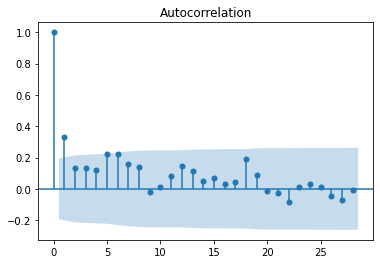

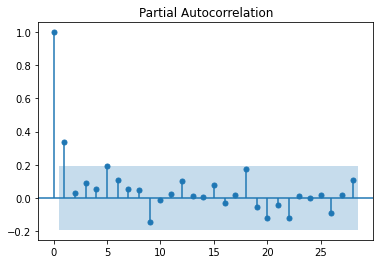

Ljung-Box for squared residuals
Statistic value [46.49331691] p_value [0.01548589]


In [19]:
# Study the squared residuals for SWN

plot_acf(residuos**2,lags=nlags)
plt.show()
plot_pacf(residuos**2,lags=nlags)
plt.show()

box_test2 = sm.stats.acorr_ljungbox(residuos**2, lags=[28])
print("Ljung-Box for squared residuals")
print("Statistic value",box_test2[0],"p_value",box_test2[1])

# <a id='toc10_'></a>[Log Transformation](#toc0_)

In [112]:
import statsmodels as sm
import pmdarima
from pmdarima.arima import ndiffs, nsdiffs

# Ho: the process is not stationary. We need, at least, a unit root
# H1: the process is stationary. We have to check different models (lags)

adf_test = sm.tsa.stattools.adfuller(y,maxlag=50) 
# print("adf_test", adf_test) # first output "The test statistic", second output "p-value"
print("ADF test for the original series")
print("Statistic Value:" , adf_test[0])
print("p-value:" , adf_test[1])


# Tests
s = 4
d = ndiffs(np.log(y), alpha = 0.05, test='adf')  # regular differences?
D = nsdiffs(np.log(y), m = s, test='ocsb') # # seasonal differences?

print("Regular differences: ", d)
print('Seasonal differences:', D)

ADF test for the original series
Statistic Value: 0.8957525362617011
p-value: 0.9930346446754534
Regular differences:  1
Seasonal differences: 1


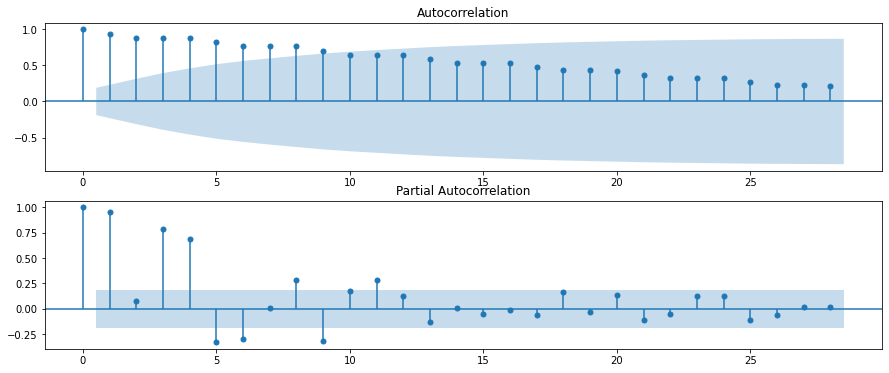

In [113]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

nlags = 28 # play with this parameter

# ValueError: Can only compute partial correlations for lags up to 50% of the sample size.

fig, ax = plt.subplots(2,1, figsize = (15,6))

plot_acf(np.log(y), lags = nlags, ax=ax[0])
plot_pacf(np.log(y), lags = nlags, method="ols", ax=ax[1])
plt.show()

# <a id='toc11_'></a>[Model 6 :log (0,1,0)(0,1,0,s)](#toc0_)

                                     SARIMAX Results                                     
Dep. Variable:                             value   No. Observations:                  107
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 4)   Log Likelihood                  70.510
Date:                           Sun, 16 Oct 2022   AIC                           -139.019
Time:                                   16:19:01   BIC                           -136.394
Sample:                                        0   HQIC                          -137.956
                                           - 107                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0147      0.001     14.995      0.000       0.013       0.017
Ljung-Box (L1) (Q):                  21.08 

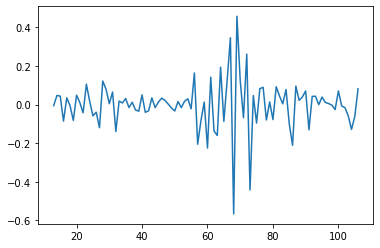

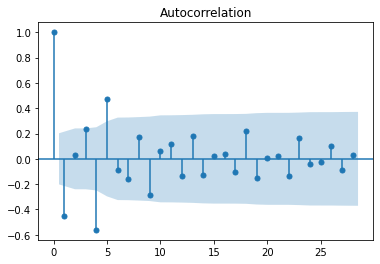

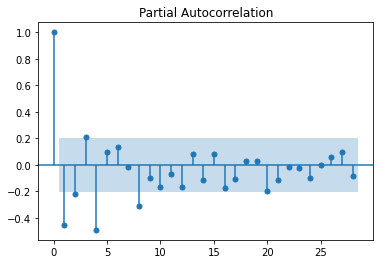

In [121]:
s = 4

fit = SARIMAX(endog = np.log(y), order = (0,1,0), seasonal_order = (0,1,0,s)).fit()
print(fit.summary())
residuos = fit.resid[5:]

nlags=28

plt.plot(residuos)
plt.show()
plot_acf(residuos, lags = nlags)
plt.show()
plot_pacf(residuos, method="ols",lags = nlags)
plt.show()

Ljung-Box: Statistic value [123.34423405] p-value [6.21670471e-14]
Shapido: Statistic value 0.8708199858665466 p-value 1.534131541802708e-07


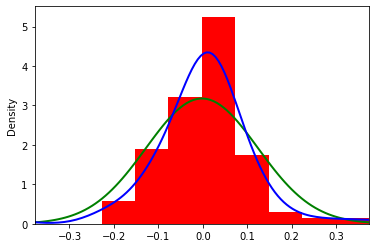

In [122]:
# Box test
import statsmodels.api as sm
box_test = sm.stats.acorr_ljungbox(residuos, lags=[28])

print("Ljung-Box: Statistic value", box_test[0], "p-value", box_test[1]) 

from scipy.stats import shapiro
import seaborn as sns
import scipy.stats as st

# Normalitresiduos test

saphiro = shapiro(residuos)
print("Shapido: Statistic value", saphiro[0],"p-value",saphiro[1]) # first output "The test statistic", second output "p-value"

mean = np.mean(residuos)
std = np.std(residuos)
mu = np.mean(residuos)
sigma = np.std(residuos)
x = np.linspace(mu -3*sigma, mu +3*sigma, 100)
pdf = st.norm.pdf(x, mu, sigma)
ax = plt.plot(x, pdf, lw = 2, color = "g")
ax = plt.hist(residuos,density=True, range = (mean - 3*std, mean + 3*std), color = "r")
ax = sns.distplot(residuos, hist = False, kde = True,
                 kde_kws = {'linewidth': 2}, color = "blue")
ax.set_xlim(mean - 3*std, mean + 3*std)

plt.show()

In [120]:
import pmdarima as pm

# Create auto_arima model
model1 = pm.auto_arima(np.log(y), #time series
                      seasonal=True, # is the time series seasonal
                      m=4, # the seasonal period - one week?
                      d=1, # non-seasonal difference order
                      D=1, # seasonal difference order
                      max_p=4, # max value of p to test 
                      max_q=4, # max value of p to test
                      max_P=4, # max value of P to test 
                      max_Q=4, # max value of Q to test 
                      information_criterion='aic', # used to select best mode
                      trace=True, # prints the information_criterion for each model it fits
                      error_action='ignore', # ignore orders that don't work
                      stepwise=True, # apply an intelligent order search
                      suppress_warnings=True) 

# Print model summary
print(model1.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[4]             : AIC=-198.379, Time=3.48 sec
 ARIMA(0,1,0)(0,1,0)[4]             : AIC=-139.019, Time=0.33 sec
 ARIMA(1,1,0)(1,1,0)[4]             : AIC=-182.819, Time=0.66 sec
 ARIMA(0,1,1)(0,1,1)[4]             : AIC=-202.503, Time=1.09 sec
 ARIMA(0,1,1)(0,1,0)[4]             : AIC=-163.251, Time=0.39 sec
 ARIMA(0,1,1)(1,1,1)[4]             : AIC=-201.278, Time=1.86 sec
 ARIMA(0,1,1)(0,1,2)[4]             : AIC=-201.167, Time=1.91 sec
 ARIMA(0,1,1)(1,1,0)[4]             : AIC=-184.094, Time=1.63 sec
 ARIMA(0,1,1)(1,1,2)[4]             : AIC=-198.548, Time=4.22 sec
 ARIMA(0,1,0)(0,1,1)[4]             : AIC=-188.555, Time=0.78 sec
 ARIMA(1,1,1)(0,1,1)[4]             : AIC=-200.508, Time=1.95 sec
 ARIMA(0,1,2)(0,1,1)[4]             : AIC=-200.509, Time=1.39 sec
 ARIMA(1,1,0)(0,1,1)[4]             : AIC=-199.650, Time=2.37 sec
 ARIMA(1,1,2)(0,1,1)[4]             : AIC=-198.556, Time=3.61 sec
 ARIMA(0,1,1)(0,1,1)[4] intercept

# <a id='toc12_'></a>[Model 7 :log (0,1,1)(0,1,1,s)](#toc0_)

                                     SARIMAX Results                                     
Dep. Variable:                             value   No. Observations:                  107
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 4)   Log Likelihood                 104.252
Date:                           Wed, 19 Oct 2022   AIC                           -202.503
Time:                                   09:07:23   BIC                           -194.628
Sample:                                        0   HQIC                          -199.315
                                           - 107                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4096      0.058     -7.103      0.000      -0.523      -0.297
ma.S.L4       -0.8203      0.062    -13.224

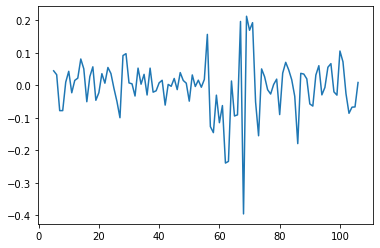

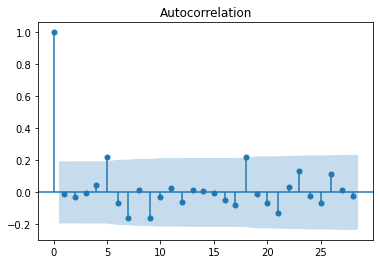

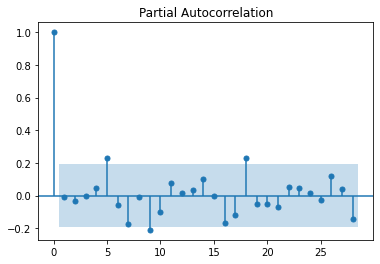

In [47]:
s = 4

fit = SARIMAX(endog = np.log(y), order = (0,1,1), seasonal_order = (0,1,1,s)).fit()
print(fit.summary())
residuos = fit.resid[5:]

nlags=28

plt.plot(residuos)
plt.show()
plot_acf(residuos, lags = nlags)
plt.show()
plot_pacf(residuos, method="ols",lags = nlags)
plt.show()

Ljung-Box: Statistic value [27.68404236] p-value [0.48128175]
Shapido: Statistic value 0.9152447581291199 p-value 6.579513410542859e-06


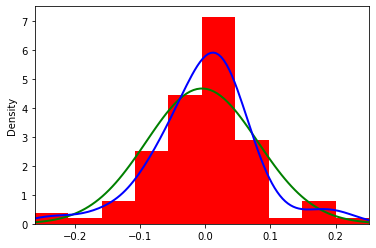

In [48]:
# Box test
import statsmodels.api as sm
box_test = sm.stats.acorr_ljungbox(residuos, lags=[28])

print("Ljung-Box: Statistic value", box_test[0], "p-value", box_test[1]) 

from scipy.stats import shapiro
import seaborn as sns
import scipy.stats as st

# Normalitresiduos test

saphiro = shapiro(residuos)
print("Shapido: Statistic value", saphiro[0],"p-value",saphiro[1]) # first output "The test statistic", second output "p-value"

mean = np.mean(residuos)
std = np.std(residuos)
mu = np.mean(residuos)
sigma = np.std(residuos)
x = np.linspace(mu -3*sigma, mu +3*sigma, 100)
pdf = st.norm.pdf(x, mu, sigma)
ax = plt.plot(x, pdf, lw = 2, color = "g")
ax = plt.hist(residuos,density=True, range = (mean - 3*std, mean + 3*std), color = "r")
ax = sns.distplot(residuos, hist = False, kde = True,
                 kde_kws = {'linewidth': 2}, color = "blue")
ax.set_xlim(mean - 3*std, mean + 3*std)

plt.show()

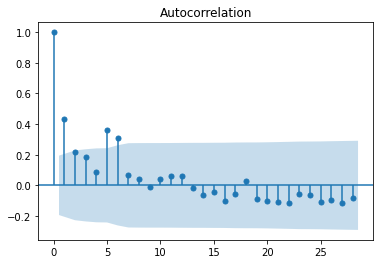

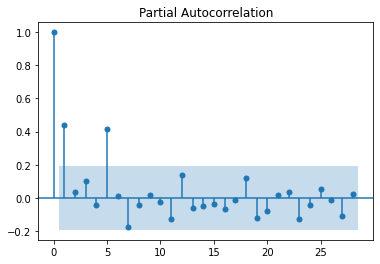

Ljung-Box for squared residuals
Statistic value [70.86603059] p_value [1.40717733e-05]


In [49]:
# Study the squared residuals for SWN

plot_acf(residuos**2,lags=nlags)
plt.show()
plot_pacf(residuos**2,lags=nlags)
plt.show()

box_test2 = sm.stats.acorr_ljungbox(residuos**2, lags=[28])
print("Ljung-Box for squared residuals")
print("Statistic value",box_test2[0],"p_value",box_test2[1])

In [50]:
std = np.std(residuos)

quantile_2_5=np.quantile(residuos, 0.025)
quantile_97_5=np.quantile(residuos, 0.975)

print("95% confidence intervals using quantiles")
print("Lower limit 2.5%:",quantile_2_5,"Upper limit 97.5%:",quantile_97_5)

print("95% confidence intervals assuming normality")
print("Normal Percentile 2.5%:",-1.96*std,"Normal Percentile 97.5%:",1.96*std)

95% confidence intervals using quantiles
Lower limit 2.5%: -0.2055867762785078 Upper limit 97.5%: 0.18058099492338242
95% confidence intervals assuming normality
Normal Percentile 2.5%: -0.16769930995454616 Normal Percentile 97.5%: 0.16769930995454616


In [55]:
model = SARIMAX(endog = np.log(y), order = (0,1,1), seasonal_order = (0,1,1,s))
results = model.fit(disp=0)

# model_fit=model.fit(disp=0)

In [56]:
# Here we construct a more complete results object.
fcast_res1 = results.get_forecast()


# Most results are collected in the `summary_frame` attribute.
# Here we specify that we want a confidence level of 90%
print(fcast_res1.summary_frame(alpha=0.0025))

value      mean   mean_se  mean_ci_lower  mean_ci_upper
107   -0.399772  0.085086      -0.657015      -0.142529


In [59]:
fcast_res2 = results.get_forecast(steps=4)
# Note: since we did not specify the alpha parameter, the
# confidence level is at the default, 95%
print(fcast_res2.summary_frame())

value      mean   mean_se  mean_ci_lower  mean_ci_upper
107   -0.399772  0.085086      -0.566537      -0.233008
108   -0.358012  0.098809      -0.551673      -0.164351
109    0.021438  0.110845      -0.195814       0.238691
110   -0.123057  0.121697      -0.361579       0.115466


# <a id='toc13_'></a>[Model 8 :log (1,1,2)(1,1,0,s)](#toc0_)

                                     SARIMAX Results                                      
Dep. Variable:                              value   No. Observations:                  107
Model:             SARIMAX(1, 1, 2)x(1, 1, [], 4)   Log Likelihood                  97.111
Date:                            Wed, 19 Oct 2022   AIC                           -184.223
Time:                                    07:15:03   BIC                           -171.098
Sample:                                         0   HQIC                          -178.908
                                            - 107                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8168      0.112     -7.294      0.000      -1.036      -0.597
ma.L1          0.5173      0.138   

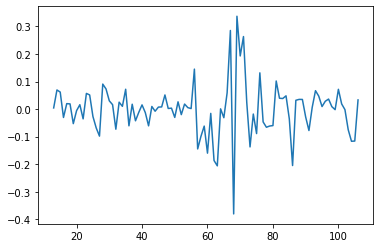

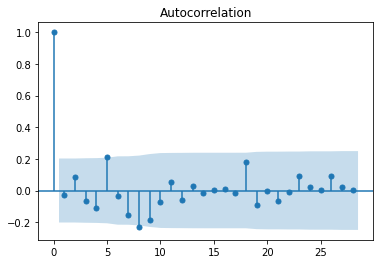

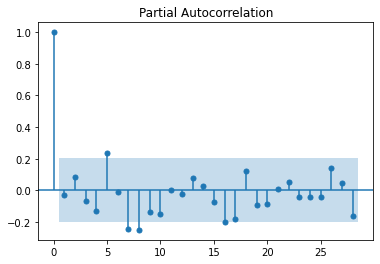

In [43]:
s = 4

fit = SARIMAX(endog = np.log(y), order = (1,1,2), seasonal_order = (1,1,0,s)).fit()
print(fit.summary())
residuos = fit.resid[13:]

nlags=28

plt.plot(residuos)
plt.show()
plot_acf(residuos, lags = nlags)
plt.show()
plot_pacf(residuos, method="ols",lags = nlags)
plt.show()

Ljung-Box: Statistic value [27.98298641] p-value [0.46534947]
Shapido: Statistic value 0.908602237701416 p-value 6.675103577435948e-06


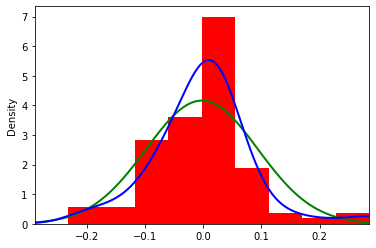

In [44]:
# Box test
import statsmodels.api as sm
box_test = sm.stats.acorr_ljungbox(residuos, lags=[28])

print("Ljung-Box: Statistic value", box_test[0], "p-value", box_test[1]) 

from scipy.stats import shapiro
import seaborn as sns
import scipy.stats as st

# Normalitresiduos test

saphiro = shapiro(residuos)
print("Shapido: Statistic value", saphiro[0],"p-value",saphiro[1]) # first output "The test statistic", second output "p-value"

mean = np.mean(residuos)
std = np.std(residuos)
mu = np.mean(residuos)
sigma = np.std(residuos)
x = np.linspace(mu -3*sigma, mu +3*sigma, 100)
pdf = st.norm.pdf(x, mu, sigma)
ax = plt.plot(x, pdf, lw = 2, color = "g")
ax = plt.hist(residuos,density=True, range = (mean - 3*std, mean + 3*std), color = "r")
ax = sns.distplot(residuos, hist = False, kde = True,
                 kde_kws = {'linewidth': 2}, color = "blue")
ax.set_xlim(mean - 3*std, mean + 3*std)

plt.show()

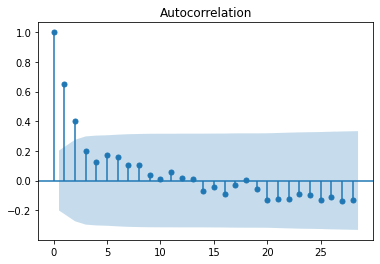

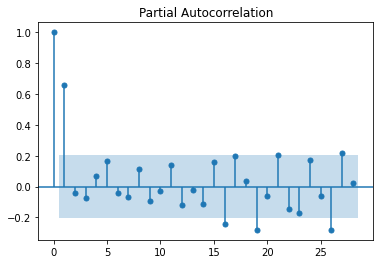

Ljung-Box for squared residuals
Statistic value [90.36195824] p_value [1.74036879e-08]


In [45]:
# Study the squared residuals for SWN

plot_acf(residuos**2,lags=nlags)
plt.show()
plot_pacf(residuos**2,lags=nlags)
plt.show()

box_test2 = sm.stats.acorr_ljungbox(residuos**2, lags=[28])
print("Ljung-Box for squared residuals")
print("Statistic value",box_test2[0],"p_value",box_test2[1])